In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
import pandas as pd

2021-12-23 05:45:35.178628: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-23 05:45:35.178696: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
#training data
df = pd.read_csv('Full_data_Asia_cotton_wheat_other_crops_2018_training_training_data.csv')
Full_data = df
print(df.shape)
df.head()

(1854556, 65)


,fid,label,row_loc,col_loc,tile,20180523_B01,20180523_B02,20180523_B03,20180523_B04,20180523_B05,...,20180915_B03,20180915_B04,20180915_B05,20180915_B06,20180915_B07,20180915_B08,20180915_B8A,20180915_B09,20180915_B11,20180915_B12
0,1000886,2,6325,9716,0,1085,1154,1524,1816,2265,...,1312,1648,1727,2431,2689,2750,2896,3223,2523,2067
1,1000886,2,6325,9717,0,1085,1282,1810,2156,2265,...,1510,1760,1727,2431,2689,4034,2896,3223,2523,2067
2,1000886,2,6326,9716,0,1085,1214,1620,1970,2393,...,1322,1526,1776,2851,3145,3232,3204,3223,2481,1929
3,1000886,2,6326,9717,0,1085,1394,1914,2350,2393,...,1408,1680,1776,2851,3145,3658,3204,3223,2481,1929
4,1000886,2,6326,9718,0,1085,1282,1802,2188,2601,...,1508,1782,1985,3267,3582,3828,3723,3223,2607,1950


In [4]:
#testing data
df1 = pd.read_csv('Full_data_Asia_cotton_wheat_other_crops_2018_testing_data.csv')
Full_data = df
print(df.shape)
df.head()

(1854556, 65)


,fid,label,row_loc,col_loc,tile,20180523_B01,20180523_B02,20180523_B03,20180523_B04,20180523_B05,...,20180915_B03,20180915_B04,20180915_B05,20180915_B06,20180915_B07,20180915_B08,20180915_B8A,20180915_B09,20180915_B11,20180915_B12
0,1000886,2,6325,9716,0,1085,1154,1524,1816,2265,...,1312,1648,1727,2431,2689,2750,2896,3223,2523,2067
1,1000886,2,6325,9717,0,1085,1282,1810,2156,2265,...,1510,1760,1727,2431,2689,4034,2896,3223,2523,2067
2,1000886,2,6326,9716,0,1085,1214,1620,1970,2393,...,1322,1526,1776,2851,3145,3232,3204,3223,2481,1929
3,1000886,2,6326,9717,0,1085,1394,1914,2350,2393,...,1408,1680,1776,2851,3145,3658,3204,3223,2481,1929
4,1000886,2,6326,9718,0,1085,1282,1802,2188,2601,...,1508,1782,1985,3267,3582,3828,3723,3223,2607,1950


In [5]:
#Training
list_of_column_names = list(df.columns)
  
# displaying the list of column names
print('List of column names : ', 
      list_of_column_names)

List of column names :  ['fid', 'label', 'row_loc', 'col_loc', 'tile', '20180523_B01', '20180523_B02', '20180523_B03', '20180523_B04', '20180523_B05', '20180523_B06', '20180523_B07', '20180523_B08', '20180523_B8A', '20180523_B09', '20180523_B11', '20180523_B12', '20180617_B01', '20180617_B02', '20180617_B03', '20180617_B04', '20180617_B05', '20180617_B06', '20180617_B07', '20180617_B08', '20180617_B8A', '20180617_B09', '20180617_B11', '20180617_B12', '20180727_B01', '20180727_B02', '20180727_B03', '20180727_B04', '20180727_B05', '20180727_B06', '20180727_B07', '20180727_B08', '20180727_B8A', '20180727_B09', '20180727_B11', '20180727_B12', '20180816_B01', '20180816_B02', '20180816_B03', '20180816_B04', '20180816_B05', '20180816_B06', '20180816_B07', '20180816_B08', '20180816_B8A', '20180816_B09', '20180816_B11', '20180816_B12', '20180915_B01', '20180915_B02', '20180915_B03', '20180915_B04', '20180915_B05', '20180915_B06', '20180915_B07', '20180915_B08', '20180915_B8A', '20180915_B09', '

In [6]:
#testing
list_of_column_names = list(df1.columns)
  
# displaying the list of column names
print('List of column names : ', 
      list_of_column_names)

List of column names :  ['fid', 'label', 'row_loc', 'col_loc', 'tile', '20180523_B01', '20180523_B02', '20180523_B03', '20180523_B04', '20180523_B05', '20180523_B06', '20180523_B07', '20180523_B08', '20180523_B8A', '20180523_B09', '20180523_B11', '20180523_B12', '20180617_B01', '20180617_B02', '20180617_B03', '20180617_B04', '20180617_B05', '20180617_B06', '20180617_B07', '20180617_B08', '20180617_B8A', '20180617_B09', '20180617_B11', '20180617_B12', '20180727_B01', '20180727_B02', '20180727_B03', '20180727_B04', '20180727_B05', '20180727_B06', '20180727_B07', '20180727_B08', '20180727_B8A', '20180727_B09', '20180727_B11', '20180727_B12', '20180816_B01', '20180816_B02', '20180816_B03', '20180816_B04', '20180816_B05', '20180816_B06', '20180816_B07', '20180816_B08', '20180816_B8A', '20180816_B09', '20180816_B11', '20180816_B12', '20180915_B01', '20180915_B02', '20180915_B03', '20180915_B04', '20180915_B05', '20180915_B06', '20180915_B07', '20180915_B08', '20180915_B8A', '20180915_B09', '

In [7]:
# Training
fids = df['fid'].unique

In [8]:
# Testing
fids = df1['fid'].unique

In [9]:
# training
# max_value = df.to_numpy().max()
max_value = df[list_of_column_names[5:]].to_numpy().max()
print(max_value)

11696


In [10]:
# testing
max_value = df1[list_of_column_names[5:]].to_numpy().max()
print(max_value)

5860.0


In [11]:
max_value = 11696

In [12]:
# train = df[(df['fid'] > 1) & (df['fid'] <= 1295)]
# print ("Train data shape:",train.shape)
# validation= df[(df['fid'] > 1295) & (df['fid'] <= 1573)]
# print ("Validation data shape:",validation.shape)
# test = df[df['fid'] > 1573]
# print ("Test data shape:",test.shape)

In [13]:
train_check = df.loc[df.label > 8]
val_check = df.loc[df.label > 8]
train_check.shape, val_check.shape
# train.head()

((0, 65), (0, 65))

In [14]:
# val =  df1
# val.shape,

In [15]:
# group_train
train_grouped = df.groupby('fid').mean().reset_index()
# test_grouped = test.groupby('fid').mean().reset_index()
train_grouped.head()
# test_grouped.head()

,fid,label,row_loc,col_loc,tile,20180523_B01,20180523_B02,20180523_B03,20180523_B04,20180523_B05,...,20180915_B03,20180915_B04,20180915_B05,20180915_B06,20180915_B07,20180915_B08,20180915_B8A,20180915_B09,20180915_B11,20180915_B12
0,1000001,2.0,6879.449324,4131.104730,1.0,934.706081,1281.577703,1766.331081,2260.554054,2419.523649,...,769.486486,723.270270,1248.908784,2924.986486,3419.702703,3705.418919,3588.604730,3616.689189,1771.594595,1141.300676
1,1000002,2.0,6900.639301,4142.662009,1.0,1014.786900,1403.611354,1917.923144,2439.451528,2602.896070,...,728.159825,672.917904,1223.949345,2720.457642,3134.012227,3374.420961,3277.004367,3303.967686,1623.747598,1017.874236
2,1000003,2.0,6923.320996,4114.007020,1.0,914.619017,1294.645820,1790.247607,2340.177409,2483.268028,...,749.272495,751.844288,1210.204212,2669.949585,3087.539247,3317.230377,3216.981493,3231.868539,1714.499043,1139.816209
3,1000004,2.0,6996.474708,4098.463035,1.0,1032.984436,1411.112840,1915.922179,2477.704280,2622.887160,...,1173.544747,1317.178988,1735.054475,2862.284047,3207.848249,3450.661479,3322.229572,3303.431907,2364.727626,1849.778210
4,1000005,2.0,6864.043250,4121.942333,1.0,1124.249017,1569.803408,2106.115334,2661.643512,2812.981651,...,995.321101,986.003932,1591.956750,3198.521625,3620.277851,3888.838794,3753.905636,3745.402359,2022.475754,1391.536042


In [16]:
# group_validation
val_grouped = df1.groupby('fid').mean().reset_index()
val_grouped.head()

,fid,label,row_loc,col_loc,tile,20180523_B01,20180523_B02,20180523_B03,20180523_B04,20180523_B05,...,20180915_B03,20180915_B04,20180915_B05,20180915_B06,20180915_B07,20180915_B08,20180915_B8A,20180915_B09,20180915_B11,20180915_B12
0,1002001,2.0,7167.029304,4603.450549,1.0,916.285714,1329.208791,1826.102564,2331.223443,2499.780220,...,1009.498168,1003.296703,1662.897436,3283.721612,3765.304029,4044.073260,3922.912088,3894.531136,2231.908425,1491.586081
1,1002002,1.0,7178.323077,4602.400000,1.0,583.603077,689.750769,1077.821538,1176.120000,1651.609231,...,1867.735385,2399.704615,2746.116923,3328.280000,3593.230769,3861.169231,3758.326154,3788.526154,3397.295385,2803.350769
2,1002003,2.0,7192.691729,4579.911278,1.0,926.583459,1302.069173,1812.159398,2375.019549,2520.421053,...,990.539850,1028.103759,1710.627068,2989.921805,3349.454135,3588.421053,3489.335338,3500.190977,2166.899248,1474.772932
3,1002004,2.0,7226.382812,4611.000000,1.0,776.523438,1252.683594,1740.554688,2245.742188,2382.027344,...,1147.296875,1208.910156,1875.636719,3230.203125,3618.929688,3874.578125,3762.875000,3751.183594,2414.382812,1710.039062
4,1002005,1.0,7238.490775,4616.332103,1.0,543.177122,667.630996,1032.036900,1143.549815,1598.826568,...,1852.000000,2405.715867,2721.959410,3203.221402,3447.671587,3707.298893,3616.612546,3662.616236,3450.239852,2837.874539


In [17]:
# X_test = test_grouped.drop(columns=['label', 'fid', 'row_loc', 'col_loc', 'tile'])
# print (X_test.shape)
# test_npy = X_test.to_numpy()
# X_test.head()

In [18]:

# Generating training and validation data based on field ids
train_percentage = 0.8

n_fields = len(train_grouped['fid'])
# np.random.seed(10)
# train_fields = np.random.choice(df['field_id'], int(n_fields * train_percentage), replace=False)
# val_fields = df['field_id'][~np.in1d(df['field_id'], train_fields)]

X_train, X_test = train_test_split(train_grouped, test_size=0.2)
y_train, y_test = X_train["label"], X_test["label"]
# X_train, X_val = df[df['field_id'].isin(train_fields)], df[df['field_id'].isin(val_fields)]
X_train = X_train.drop(columns=['label', 'fid', 'row_loc', 'col_loc', 'tile'])
X_test = X_test.drop(columns=['label', 'fid', 'row_loc', 'col_loc', 'tile'])
# y_train, y_val = df[df['field_id'].isin(train_fields)]['label'], df[df['field_id'].isin(val_fields)]['label']


# validation
X_val = val_grouped.drop(columns=['label', 'fid', 'row_loc', 'col_loc', 'tile'])
y_val = val_grouped["label"]
# print (X_val.shape, y_val.shape)


print(
    f"Train data shape is {X_train.shape}\n",
    f"testing data shape is {X_test.shape}\n",
    f"validation data shape is {X_val.shape}\n",
)


train_npy = X_train.to_numpy()
test_npy = X_test.to_numpy()
val_npy = X_val.to_numpy()
#test_grouped = 

Train data shape is (1235, 60)
 testing data shape is (309, 60)
 validation data shape is (294, 60)



In [19]:
print(max_value)

11696


In [20]:
X_train.head()

,20180523_B01,20180523_B02,20180523_B03,20180523_B04,20180523_B05,20180523_B06,20180523_B07,20180523_B08,20180523_B8A,20180523_B09,...,20180915_B03,20180915_B04,20180915_B05,20180915_B06,20180915_B07,20180915_B08,20180915_B8A,20180915_B09,20180915_B11,20180915_B12
1269,1103.413462,1325.091469,1750.908284,2233.654832,2397.333087,2487.158531,2574.054487,2721.067554,2611.585306,2898.169379,...,874.710059,897.534270,1368.842702,3204.557692,3934.407544,4302.511834,4055.797584,3983.136588,2190.178994,1477.121548
254,892.810000,1176.201429,1622.543810,2148.460000,2296.245714,2428.304762,2536.372381,2677.495238,2589.045238,2632.929524,...,1254.014286,1464.210476,1859.826190,2784.179524,3083.025238,3227.075238,3188.891429,3272.824762,2459.816190,1975.100952
1221,431.865282,517.811768,797.605165,829.582801,1218.269436,2316.867146,2801.492013,3057.068690,2956.020767,2926.522630,...,1933.772897,2639.193291,2957.023163,3383.198083,3597.987487,3977.936635,3803.455272,3685.087593,3605.658946,2805.748403
422,664.254237,961.501211,1422.612591,1865.888620,2105.549637,2514.915254,2701.300242,2884.188862,2779.138015,2803.426150,...,1593.365617,2136.726392,2364.748184,2539.426150,2678.254237,2832.973366,2799.985472,2867.682809,3232.861985,2939.941889
1463,371.050713,485.757528,810.841521,880.202853,1316.930269,2332.383518,2814.331220,3085.270998,3000.992076,2980.297940,...,1367.641838,1580.156894,2000.128368,2819.936609,3141.641838,3373.359746,3304.362916,3293.640254,2609.985737,2156.725832


In [21]:
# list_of_column_names = list(X_train.columns)
  
# # displaying the list of column names
# print('List of column names : ', 
#       list_of_column_names)

In [22]:
# train_npy = train.to_numpy()
# test_npy = test.to_numpy()
# val_npy = validation.to_numpy()

In [23]:
yTrain = y_train
print("The initial training labels are ",np.unique(yTrain))
yTrain = yTrain - 1
print("The edited training labels are ",np.unique(yTrain))
# yTest = test_npy[:,-1].astype(int)
yTest = y_test
print("The initial testing labels are ",np.unique(yTest))
yTest = yTest - 1
# yTest = yTest - 1
print("The edited testing labels are ",np.unique(yTest))
yVal = y_val
print("The initial testing labels are ",np.unique(yVal))
yVal = yVal - 1
# yTest = yTest - 1
print("The edited testing labels are ",np.unique(yVal))

The initial training labels are  [1. 2. 3. 4. 5. 6. 7. 8.]
The edited training labels are  [0. 1. 2. 3. 4. 5. 6. 7.]
The initial testing labels are  [1. 2. 3. 4. 5. 6. 7. 8.]
The edited testing labels are  [0. 1. 2. 3. 4. 5. 6. 7.]
The initial testing labels are  [1. 2. 3. 4. 5. 6. 7. 8.]
The edited testing labels are  [0. 1. 2. 3. 4. 5. 6. 7.]


In [24]:
# ytest = y_test
# print("The initial training labels are ",np.unique(ytest))
# ytest = ytest - 1
# print("The edited training labels are ",np.unique(ytest))
# yTest = test_npy[:,-1].astype(int)
# yVal = y_val
# print("The initial testing labels are ",np.unique(yVal))
# yVal = yVal - 1
# # yTest = yTest - 1
# print("The edited testing labels are ",np.unique(yVal))

In [25]:
# field_idvalues =  val_npy[:,0]
# print(field_idvalues.shape)
# # print(field_idvalues)

In [26]:
#imagedata
# xTrain = train_npy[:,5:-1]
print("xTrain shape: ",X_train.shape)
# xTest = test_npy[:,5:-1]
# print("xTest shape: ",xTest.shape)
# xVal = val_npy[:,5:-1]
print("xTest shape: ",X_test.shape)
print("xVal shape: ",X_val.shape)
# print("yTest shape: ",yTest.shape)
print("yTrain shape: ",yTrain.shape)
print("yTest shape: ",yTest.shape)
print("yVal shape: ",yVal.shape)
print("Maximum_value: ",max_value)

xTrain shape:  (1235, 60)
xTest shape:  (309, 60)
xVal shape:  (294, 60)
yTrain shape:  (1235,)
yTest shape:  (309,)
yVal shape:  (294,)
Maximum_value:  11696


In [27]:
(unique, counts) = np.unique(yTrain, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('Train freq:', frequencies)

(unique, counts) = np.unique(yTest, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('Test freq:', frequencies)

Train freq: [[  0. 541.]
 [  1. 581.]
 [  2.   7.]
 [  3.  26.]
 [  4.   5.]
 [  5.  59.]
 [  6.   6.]
 [  7.  10.]]
Test freq: [[  0. 135.]
 [  1. 140.]
 [  2.   3.]
 [  3.  10.]
 [  4.   2.]
 [  5.  13.]
 [  6.   3.]
 [  7.   3.]]


In [28]:
X_train = train_npy
X_test = test_npy
X_val = val_npy
print("xTrain shape: ",X_train.shape)
print("xTest shape: ",X_test.shape)
print("xVal shape: ",X_val.shape)

xTrain shape:  (1235, 60)
xTest shape:  (309, 60)
xVal shape:  (294, 60)


In [29]:
# print("ytest shape: ",y_test.shape)

In [30]:
# y_test_npy = y_test.to_numpy()
# ytest = y_test_npy / max_value
# ytest = np.reshape(ytest,(256,2,12))
# print("ytest:",ytest.shape)

In [31]:
# Normalise the data
xTrain = X_train / max_value
xTest = X_test / max_value
xVal = X_val/max_value
# Reshape the data
xTrain = np.reshape(xTrain,(1235,5,1,12))
xTest = np.reshape(xTest,(309,5,1,12))
xVal = np.reshape(xVal,(294,5,1,12))

test_npy

# xTrain = np.expand_dims(xTrain,axis =-1)
# xTest = np.expand_dims(xTest,axis =-1)


# Print the shape of reshaped data
print("xTrain:",xTrain.shape)
print("xTest:",xTest.shape)
print("xVal:",xVal.shape)

xTrain: (1235, 5, 1, 12)
xTest: (309, 5, 1, 12)
xVal: (294, 5, 1, 12)


In [32]:
import keras_tuner as kt
from tensorflow import keras
from keras_tuner import RandomSearch

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [34]:
label = train_grouped["label"]
print (label.max())

8.0


In [35]:
from sklearn.utils import class_weight
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()  
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(label),
                                                 label)

# class_weights_dict = dict(zip(le.transform(list(le.classes_)), class_weights))
print("Class weights are...:", class_weights)
# from sklearn.utils import class_weight
# weight = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weight = {i : class_weights[i] for i in range(8)} 
print("Class weights are...:", class_weight)

Class weights are...: [ 0.28550296  0.26768377 19.3         5.36111111 27.57142857  2.68055556
 21.44444444 14.84615385]
Class weights are...: {0: 0.28550295857988167, 1: 0.26768377253814146, 2: 19.3, 3: 5.361111111111111, 4: 27.571428571428573, 5: 2.6805555555555554, 6: 21.444444444444443, 7: 14.846153846153847}


/home/Programs/miniconda3/envs/tens/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[1. 2. 3. 4. 5. 6. 7. 8.], y=0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
1539    1.0
1540    2.0
1541    2.0
1542    2.0
1543    2.0
Name: label, Length: 1544, dtype: float64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [36]:
modelName= "Cotton_wheat_RNN_LSTM_model_20211223"
#save the best weights over9the same file with the model name

modelpath = f"{modelName}_bestweights.hdf5" #the model will be saved in the same folder as where the notebook is
checkpoint = ModelCheckpoint(modelpath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max') #max validation accuracy
callbacks_list = [checkpoint]

In [37]:
# myadam = keras.optimizers.Adam(learning_rate=0.006)

In [38]:
myadam = keras.optimizers.Adam(learning_rate=0.003)

model = tf.keras.models.Sequential([
    tf.keras.layers.ConvLSTM1D(
        32, 1, return_sequences=True, activation ='relu', input_shape = (None, 1, 12)
    ),
    tf.keras.layers.TimeDistributed(
        tf.keras.layers.BatchNormalization()
    ),
    tf.keras.layers.TimeDistributed(
        tf.keras.layers.MaxPooling1D(pool_size=1, strides=1)
    ),
#     tf.keras.layers.ConvLSTM1D(32,1, return_sequences=True, activation ='relu'),
    tf.keras.layers.TimeDistributed(
        tf.keras.layers.BatchNormalization()
    ),
    tf.keras.layers.TimeDistributed(
        tf.keras.layers.MaxPooling1D(pool_size=1, strides=1)
    ),
    tf.keras.layers.ConvLSTM1D(64,1, activation ='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(540, activation ='relu'),
    tf.keras.layers.Dense(8, activation ='softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', 
     optimizer = myadam,               
              metrics = ['accuracy'])
model.summary()

2021-12-23 05:45:47.836109: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-23 05:45:47.836152: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-23 05:45:47.836227: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (challenge-vm): /proc/driver/nvidia/version does not exist
2021-12-23 05:45:47.836487: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m1d (ConvLSTM1D)    (None, None, 1, 32)       5760      
_________________________________________________________________
time_distributed (TimeDistri (None, None, 1, 32)       128       
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1, 32)       0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1, 32)       128       
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 1, 32)       0         
_________________________________________________________________
conv_lst_m1d_1 (ConvLSTM1D)  (None, 1, 64)             24832     
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 64)             2

In [39]:
history = model.fit(
    xTrain,
    yTrain,
    batch_size=30,
    epochs=200,
    validation_data=(xTest, yTest),
    class_weight = class_weight,
    callbacks=callbacks_list,
)

2021-12-23 05:45:57.845986: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
42/42 [==============================] - 7s 29ms/step - loss: 2.0329 - accuracy: 0.6842 - val_loss: 2.1088 - val_accuracy: 0.0097

Epoch 00001: val_accuracy improved from -inf to 0.00971, saving model to Cotton_wheat_RNN_LSTM_model_20211223_bestweights.hdf5
Epoch 2/200
42/42 [==============================] - 1s 14ms/step - loss: 1.6884 - accuracy: 0.7579 - val_loss: 2.2037 - val_accuracy: 0.0065

Epoch 00002: val_accuracy did not improve from 0.00971
Epoch 3/200
42/42 [==============================] - 1s 14ms/step - loss: 1.4305 - accuracy: 0.5757 - val_loss: 2.0513 - val_accuracy: 0.0065

Epoch 00003: val_accuracy did not improve from 0.00971
Epoch 4/200
42/42 [==============================] - 1s 14ms/step - loss: 1.4342 - accuracy: 0.7117 - val_loss: 2.4398 - val_accuracy: 0.0065

Epoch 00004: val_accuracy did not improve from 0.00971
Epoch 5/200
42/42 [==============================] - 1s 15ms/step - loss: 1.5068 - accuracy: 0.6429 - val_loss: 2.4422 - val_accuracy: 0

42/42 [==============================] - 1s 14ms/step - loss: 0.5737 - accuracy: 0.7887 - val_loss: 1.2355 - val_accuracy: 0.5793

Epoch 00040: val_accuracy did not improve from 0.87055
Epoch 41/200
42/42 [==============================] - 1s 14ms/step - loss: 0.5444 - accuracy: 0.7911 - val_loss: 0.9547 - val_accuracy: 0.7055

Epoch 00041: val_accuracy did not improve from 0.87055
Epoch 42/200
42/42 [==============================] - 1s 14ms/step - loss: 0.4549 - accuracy: 0.8146 - val_loss: 0.8985 - val_accuracy: 0.7702

Epoch 00042: val_accuracy did not improve from 0.87055
Epoch 43/200
42/42 [==============================] - 1s 14ms/step - loss: 0.5440 - accuracy: 0.7943 - val_loss: 1.3255 - val_accuracy: 0.6505

Epoch 00043: val_accuracy did not improve from 0.87055
Epoch 44/200
42/42 [==============================] - 1s 14ms/step - loss: 0.6838 - accuracy: 0.7895 - val_loss: 2.8550 - val_accuracy: 0.5049

Epoch 00044: val_accuracy did not improve from 0.87055
Epoch 45/200
42/42

42/42 [==============================] - 1s 14ms/step - loss: 0.5322 - accuracy: 0.8364 - val_loss: 1.1354 - val_accuracy: 0.6570

Epoch 00081: val_accuracy did not improve from 0.87055
Epoch 82/200
42/42 [==============================] - 1s 14ms/step - loss: 0.4262 - accuracy: 0.8551 - val_loss: 0.7579 - val_accuracy: 0.8447

Epoch 00082: val_accuracy did not improve from 0.87055
Epoch 83/200
42/42 [==============================] - 1s 14ms/step - loss: 0.4952 - accuracy: 0.8113 - val_loss: 1.2106 - val_accuracy: 0.7961

Epoch 00083: val_accuracy did not improve from 0.87055
Epoch 84/200
42/42 [==============================] - 1s 14ms/step - loss: 0.4578 - accuracy: 0.8097 - val_loss: 3.3794 - val_accuracy: 0.3463

Epoch 00084: val_accuracy did not improve from 0.87055
Epoch 85/200
42/42 [==============================] - 1s 14ms/step - loss: 0.4445 - accuracy: 0.8381 - val_loss: 3.1115 - val_accuracy: 0.3689

Epoch 00085: val_accuracy did not improve from 0.87055
Epoch 86/200
42/42

42/42 [==============================] - 1s 14ms/step - loss: 0.3424 - accuracy: 0.8623 - val_loss: 1.2162 - val_accuracy: 0.7314

Epoch 00122: val_accuracy did not improve from 0.87055
Epoch 123/200
42/42 [==============================] - 1s 14ms/step - loss: 0.4250 - accuracy: 0.7943 - val_loss: 1.2182 - val_accuracy: 0.7217

Epoch 00123: val_accuracy did not improve from 0.87055
Epoch 124/200
42/42 [==============================] - 1s 14ms/step - loss: 0.3604 - accuracy: 0.8470 - val_loss: 0.8206 - val_accuracy: 0.7896

Epoch 00124: val_accuracy did not improve from 0.87055
Epoch 125/200
42/42 [==============================] - 1s 15ms/step - loss: 0.3642 - accuracy: 0.8632 - val_loss: 0.7117 - val_accuracy: 0.8673

Epoch 00125: val_accuracy did not improve from 0.87055
Epoch 126/200
42/42 [==============================] - 1s 14ms/step - loss: 0.4067 - accuracy: 0.8713 - val_loss: 1.0137 - val_accuracy: 0.7929

Epoch 00126: val_accuracy did not improve from 0.87055
Epoch 127/200



Epoch 00162: val_accuracy did not improve from 0.88350
Epoch 163/200
42/42 [==============================] - 1s 14ms/step - loss: 0.7066 - accuracy: 0.7239 - val_loss: 5.7038 - val_accuracy: 0.2557

Epoch 00163: val_accuracy did not improve from 0.88350
Epoch 164/200
42/42 [==============================] - 1s 15ms/step - loss: 0.8126 - accuracy: 0.7093 - val_loss: 5.9835 - val_accuracy: 0.3754

Epoch 00164: val_accuracy did not improve from 0.88350
Epoch 165/200
42/42 [==============================] - 1s 14ms/step - loss: 0.4820 - accuracy: 0.7887 - val_loss: 1.6573 - val_accuracy: 0.6052

Epoch 00165: val_accuracy did not improve from 0.88350
Epoch 166/200
42/42 [==============================] - 1s 14ms/step - loss: 0.3725 - accuracy: 0.8421 - val_loss: 1.0521 - val_accuracy: 0.7023

Epoch 00166: val_accuracy did not improve from 0.88350
Epoch 167/200
42/42 [==============================] - 1s 14ms/step - loss: 0.3319 - accuracy: 0.8672 - val_loss: 0.9977 - val_accuracy: 0.7476


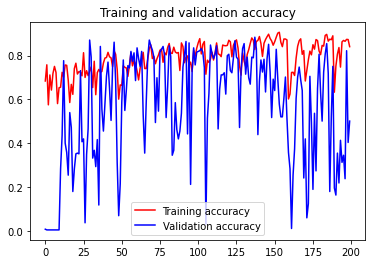

<Figure size 432x288 with 0 Axes>

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [41]:
model_json = model.to_json()
with open(f"{modelName}.json", "w") as json_file:
    json_file.write(model_json)

In [42]:
import tensorflow_hub as hub

In [43]:
from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open(f"{modelName}.json", "r")
loaded_model_json = json_file.read()
json_file.close()


In [44]:
print(loaded_model_json)

{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, null, 1, 12], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv_lst_m1d_input"}}, {"class_name": "ConvLSTM1D", "config": {"name": "conv_lst_m1d", "trainable": true, "batch_input_shape": [null, null, 1, 12], "dtype": "float32", "return_sequences": true, "return_state": false, "go_backwards": false, "stateful": false, "unroll": false, "time_major": false, "filters": 32, "kernel_size": [1], "strides": [1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1], "activation": "relu", "recurrent_activation": "hard_sigmoid", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "recurrent_initializer": {"class_name": "Orthogonal", "config": {"gain": 1.0, "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "unit_forget_bias": true, "kernel_regularizer"

In [45]:
model = model_from_json(loaded_model_json, custom_objects={'KerasLayer': hub.KerasLayer})

In [46]:
model.load_weights(f"{modelName}_bestweights.hdf5")

In [47]:
predictions = model.predict(xVal, verbose = 1)
len(predictions)

10/10 [==============================] - 1s 2ms/step


294

In [43]:
# predictions_2 = model.predict(ytest, verbose = 1)
# len(predictions)

In [54]:
# print(predictions_2[:5])

In [48]:
print(predictions[:5])

[[1.5988844e-08 9.9997079e-01 3.5188004e-09 2.9169325e-05 7.6860698e-14
  6.9723699e-11 1.0112761e-22 9.3703682e-18]
 [9.9997568e-01 7.9039825e-10 1.7372397e-05 2.6726644e-07 9.8888626e-11
  6.6715311e-06 6.6204724e-13 9.6683426e-18]
 [3.2190101e-10 9.9996960e-01 1.6315314e-08 3.0438245e-05 1.7934352e-12
  3.5010547e-13 2.0523419e-25 1.1771704e-21]
 [1.4426406e-07 9.9975950e-01 2.9586303e-07 2.4005017e-04 1.2381463e-11
  3.5443629e-10 9.7532110e-20 1.2764261e-15]
 [9.9910647e-01 1.2511831e-07 6.4489897e-04 4.1393345e-05 3.3650160e-08
  2.0709015e-04 1.3273138e-09 4.6040271e-13]]


In [83]:
# print(yTest[0])

In [49]:
classification = []
for row in predictions:
    value = np.argmax(row)
    classification.append(value) 

In [48]:
# classification_2 = []
# for row in predictions_2:
#     value = np.argmax(row)
#     classification_2.append(value) 

In [51]:
print(classification)

[1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 3, 3, 5, 1, 1, 2, 3, 3, 2, 0, 0, 2, 1, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]


In [52]:
len(classification)

294

In [58]:
# len(classification_2)

In [53]:
np.unique(classification)

array([0, 1, 2, 3, 5, 7])

In [107]:
# np.unique(classification_2)

In [54]:
y_predicted = np.array(classification)

In [50]:
# y_predicted_2 = np.array(classification_2)

In [55]:
y_predicted.shape

(294,)

In [56]:
yVal.shape

(294,)

In [47]:
cMatrix = confusion_matrix(yVal, y_predicted)
print(cMatrix)

[[134   0   0   0   0   0   0   2]
 [  1 129   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   1]
 [  2   2   0   2   0   0   0   0]
 [  1   1   0   0   0   0   0   0]
 [  8   2   0   0   0   1   0   2]
 [  1   1   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0]]


In [57]:
cMatrix = confusion_matrix(yVal, y_predicted)
print(cMatrix)

[[136   0   0   0   0   0   0   0]
 [  0 130   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   1]
 [  1   1   0   4   0   0   0   0]
 [  0   1   1   0   0   0   0   0]
 [  3   1   4   4   0   1   0   0]
 [  1   1   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0]]


In [58]:
accuracy_score(yVal,y_predicted)

0.9217687074829932

In [59]:
accuracy_score(yVal,y_predicted)

0.9081632653061225

In [59]:
len(val_grouped['fid'])
df_preds = pd.DataFrame(predictions)
df_preds["field_id"] = val_grouped["fid"].reset_index(drop=True).astype(int)
df_preds = df_preds[["field_id"] + [x for x in range(8)]]
df_preds = df_preds.rename(columns={
    "field_id": "Field_ID",
    0: "Crop_ID_1",
    1: "Crop_ID_2",
    2: "Crop_ID_3",
    3: "Crop_ID_4",
    4: "Crop_ID_5",
    5: "Crop_ID_6",
    6: "Crop_ID_7",
    7: "Crop_ID_8",
#     8: "Crop_ID_9",
#     9: "Crop_ID_10"
})

In [60]:
len(df_preds)

294

In [61]:
df_preds.to_csv("20211223_RNN_validation_data_wheat_cotton_0.88test_0.92val.csv", index=False)

In [62]:
from sklearn.metrics import f1_score

In [63]:
f1_score(yVal, y_predicted, average=None)

array([0.96797153, 0.98484848, 0.        , 0.57142857, 0.        ,
       0.14285714, 0.        , 0.        ])

In [61]:
f1_score(yVal, y_predicted, average='weighted')

0.9013494492419567

In [64]:
f1_score(yVal, y_predicted, average='weighted')

0.9012249844554295

In [ ]:
y_predicted_withfid = classification+field_idvalues